# Different kinds of Transformations using the Affine Transform

This section contains the following types of transformations applied on an image using the affine transform

1. Translation
2. Rotation (about center)
3. Rotation (about center) with width and height adjusted
4. Horizontal shear
5. Vertical shear

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

First of all, we load an image into **openCV** and display that image using **matplotlib**

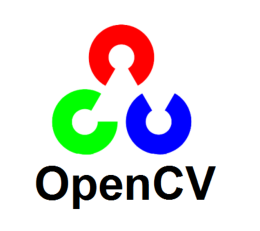

In [2]:
image_path = "OpenCV_Logo.png"
image = cv2.imread(image_path)
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

The **Affine transformation matrix** is a 2x3 transformation matrix which denotes the translation, rotation and scaling when performing an affine transform.
<br> The matrix is given as follows:

`[[scale, rotation, location]`  <---- **along x-axis** <br>
`[scale, rotation, location]]`  <---- **along y-axis**


### 1. Translation
In this first example, we set the transformation matrix **M** manually, where we set the scale factor of image as 1 and 1 (no scaling along x and y axis), <br>
and rotation is kept at zero.
<br><br>
We want to translate the image by 50 pixels each in both horizontal and vertical directions hence we choose **translate_x = 50** and **translate_y = 50**

Finally **`cv2.warpAffine()`** is applied on the image using the transformation matrix **M**.

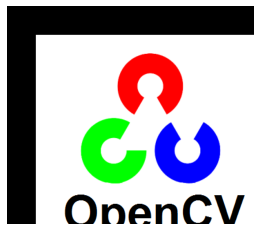

In [3]:
height, width, _ = image.shape

translate_x = 50
translate_y = 50
M = np.float32([[1, 0, translate_x], 
                [0, 1, translate_y]])
dst = cv2.warpAffine(image, M, (width, height))

plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()


### 2. Rotation
In this first example, we set the transformation matrix **M** manually, where we set the scale factor of image as 1 and 1 (no scaling along x and y axis), <br>
and rotation is kept at zero.
<br><br>
In this example, we want to rotate the image by 45 degrees. Hence we select **rotation_angle_degrees = 45**
<br><br>
We get the **transformation matrix M** using the function **`cv2.getRotationMatrix2D`**. The first parameter **(width/2, height/2)** denotes that the rotation needs to be done along the centre of the image.

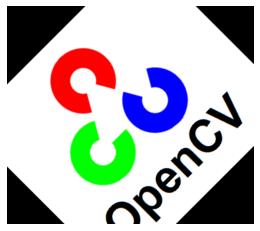

In [4]:
height, width, _ = image.shape

rotation_angle_degrees = 45

M = cv2.getRotationMatrix2D((width/2, height/2), rotation_angle_degrees, 1)
dst2 = cv2.warpAffine(image, M, (width, height))

plt.axis('off')
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.show()


### 3. Rotation with width and height adjusted
In the earlier example, we can notice that when we rotate the image, certain sections of the image become cut-off. <br>
In order to prevent that, we need to recalculate the width and height of the image

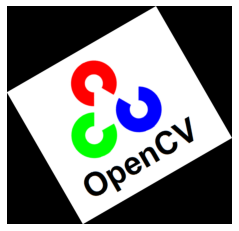

In [5]:
height, width, _ = image.shape

rotation_angle_degrees = 30

recalculated_width = int(width*(math.cos(math.radians(rotation_angle_degrees))) + height*(math.cos(math.radians(90 - rotation_angle_degrees))))
recalculated_height = int(height*(math.cos(math.radians(rotation_angle_degrees))) + width*(math.cos(math.radians(90 - rotation_angle_degrees))))

M = cv2.getRotationMatrix2D((width/2, height/2), rotation_angle_degrees, 1)

# adjust the transformation matrix M to take into account translation
M[0, 2] += (recalculated_width / 2) - (width/2)
M[1, 2] += (recalculated_height / 2) - (height/2)
dst2 = cv2.warpAffine(image, M, (recalculated_width, recalculated_height))

plt.axis('off')
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.show()

### 4. Horizontal Shear

In this example, we will apply a horizontal shear on the image.

To apply a horizontal shear, only the width needs to be recalculated since the height will remain same.

To get the **transformation matrix M** we use the function **`cv2.getAffineTransform`**

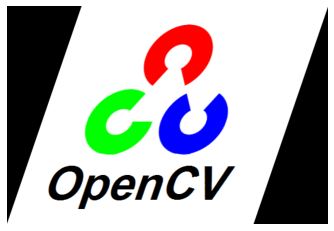

In [6]:
height, width, _ = image.shape

shear_angle_degrees = 20
horizontal_shear = height*(math.sin(math.radians(shear_angle_degrees)))

recalculated_width = int(width + horizontal_shear)

coords1 = np.float32([[0,0], [0, height-1], [width-1, height-1]])
coords2 = np.float32([[horizontal_shear,0], [0, height-1], [width-1, height-1]])

M = cv2.getAffineTransform(coords1, coords2)
dst3 = cv2.warpAffine(image, M, (recalculated_width, height))

plt.axis('off')
plt.imshow(cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB))
plt.show()

### 5. Vertical Shear

In this example, we will apply a vertical shear on the image.

To apply a vertical shear, only the height needs to be recalculated since the width will remain same.

To get the **transformation matrix M** we use the function **`cv2.getAffineTransform`**

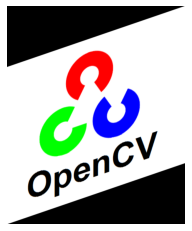

In [7]:
height, width, _ = image.shape

shear_angle_degrees = 20
vertical_shear = width*(math.sin(math.radians(shear_angle_degrees)))

recalculated_height = int(height + vertical_shear)

coords1 = np.float32([[0,0], [width - 1, 0], [width-1, height-1]])
coords2 = np.float32([[0, vertical_shear], [width - 1, 0], [width-1, height-1]])

M = cv2.getAffineTransform(coords1, coords2)
dst4 = cv2.warpAffine(image, M, (width, recalculated_height))

plt.axis('off')
plt.imshow(cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB))
plt.show()